# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your
Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017=pd.read_csv("../data/sat_2017.csv")
act_2017=pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Prints the first 10 rows of SAT 2017
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#Prints first 10 rows of ACT 2017
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: SAT 2017 shows the participation, Evidence-Based Reading and Writing scores, Math scores and total scores for each US states.
ACT 2017 shows the participation, English, Math, Reading, Science and Composite scores for each US state

#### 4a. Does the data look complete? 

Answer:Yes

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: Yes. There are issues with the data. Maryland's SAT 2017 Math score is 52 and ACT 2017 Science Score is 2.3 which is unusually lower than the rest of the values of the tests. The ACT 2017 Composite score for Wyoming is labeled 20.2x instead of a value.

The minimum possible value for SAT Evidence-Based Reading and Writing, SAT Math, SAT Total are 482, 52, 950 respectively. The maximum possible value for SAT Evidence-Based Reading and Writing, SAT Math, SAT Total are 644, 651, 1295 respectively. 

The minimum possible value for ACT English, Math, Reading, Composite are 16.3, 18, 18.1, 2.3 and 17.8 respectively. The maximum possible value for ACT English, Math, Reading, Composite are 25.5, 25.3, 26, 24.9 and 25.5 respectively. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
# Replace value of 52 with 524 for State Maryland's Math Score for SAT
sat_2017["Math"].replace(52, 524, inplace=True)
# Replace value of 2.3 with 23.2 for State Maryland's Science Score for ACT
act_2017["Science"].replace(2.3, 23.2, inplace=True)
# Replace value of 52 with 524 for State Wyoming's Composite Score for ACT
act_2017["Composite"].replace("20.2x", 20.2, inplace=True)

#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [7]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:ACT 2017 Composite scores should be a float type. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [8]:
# Removes '%' from participation.

sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: float(x[:-1]))
act_2017['Participation'] = act_2017['Participation'].map(lambda x: float(x[:-1]))


- Fix any individual values preventing other columns from being the appropriate type.

In [9]:
# Converts ACT Composite to a float type
act_2017['Composite']=pd.to_numeric(act_2017['Composite'])

- Finish your data modifications by making sure the columns are now typed appropriately.

In [10]:
sat_2017['Participation']

0       5.0
1      38.0
2      30.0
3       3.0
4      53.0
5      11.0
6     100.0
7     100.0
8     100.0
9      83.0
10     61.0
11     55.0
12     93.0
13      9.0
14     63.0
15      2.0
16      4.0
17      4.0
18      4.0
19     95.0
20     69.0
21     76.0
22    100.0
23      3.0
24      2.0
25      3.0
26     10.0
27      3.0
28     26.0
29     96.0
30     70.0
31     11.0
32     67.0
33     49.0
34      2.0
35     12.0
36      7.0
37     43.0
38     65.0
39     71.0
40     50.0
41      3.0
42      5.0
43     62.0
44      3.0
45     60.0
46     65.0
47     64.0
48     14.0
49      3.0
50      3.0
Name: Participation, dtype: float64

In [11]:
act_2017['Participation']

0      60.0
1     100.0
2      65.0
3      62.0
4     100.0
5      31.0
6     100.0
7      31.0
8      18.0
9      32.0
10     73.0
11     55.0
12     90.0
13     38.0
14     93.0
15     35.0
16     67.0
17     73.0
18    100.0
19    100.0
20      8.0
21     28.0
22     29.0
23     29.0
24    100.0
25    100.0
26    100.0
27    100.0
28     84.0
29    100.0
30     18.0
31     34.0
32     66.0
33     31.0
34    100.0
35     98.0
36     75.0
37    100.0
38     40.0
39     23.0
40     21.0
41    100.0
42     80.0
43    100.0
44     45.0
45    100.0
46     29.0
47     29.0
48     29.0
49     69.0
50    100.0
51    100.0
Name: Participation, dtype: float64

- Display the data types again to confirm they are correct.

In [12]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [13]:
#Code:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [14]:
#code
sat_2017.rename(index=str, columns={"State": "state",
                                    "Participation": "sat_participation_2017(%)",
                                    "Evidence-Based Reading and Writing" :"sat_erw_2017",
                                    "Math":"sat_math_2017",
                                    "Total":"total_2017"}, inplace=True )
act_2017.rename(index=str, columns={"State": "state",
                                    "Participation": "act_participation_2017(%)",
                                    "English" : "act_english_2017",
                                    "Math":"act_math_2017",
                                    "Reading" : "act_reading_2017",
                                    "Science" :"act_science_2017",
                                    "Composite" : "act_composite_2017"}, inplace=True )
act_2017.head(1)

,state,act_participation_2017(%),act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0


In [15]:
sat_2017.head(1)

,state,sat_participation_2017(%),sat_erw_2017,sat_math_2017,total_2017
0,Alabama,5.0,593,572,1165


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object|ACT & SAT 2017|US States| 
|sat_particpation|float|SAT 2017|SAT Participation rates for US states| 
|erw|int|SAT 2017|SAT Evidence-Based Reading and Writing scores| 
|math|int|SAT 2017|SAT Math Scores| 
|total|int|SAT 2017|SAT Total Scores| 
|act_particpation|float|ACT 2017|ACT Participation rates for US states| 
|english|float|ACT 2017|ACT English scores| 
|math|float|ACT 2017|ACT Math scores| 
|reading|float|ACT 2017|ACT Reading scores| 
|science|float|ACT 2017|ACT Science scores| 
|composite|float|ACT 2017|ACT Composite scores| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [16]:
act_2017.head()

,state,act_participation_2017(%),act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [17]:
sat_2017.head()

,state,sat_participation_2017(%),sat_erw_2017,sat_math_2017,total_2017
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [18]:
# removes the first row where it contains National scores
act_2017.drop('0', axis=0,inplace=True)

In [19]:
act_2017.head()

,state,act_participation_2017(%),act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [20]:
# Merge both dataframes on 'state'.
scores_2017=pd.merge(sat_2017,act_2017,on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [21]:
# Saves data in csv.
scores_2017.to_csv("../data/combined_2017.csv")

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [22]:
sat_2018=pd.read_csv("../data/sat_2018.csv")
act_2018=pd.read_csv("../data/act_2018.csv")

In [23]:
act_2018.dtypes

State                             object
Percentage of Students Tested      int64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
Average Composite Score          float64
dtype: object

In [24]:
sat_2018.dtypes

State            object
Participation    object
EBRW              int64
Math              int64
Total             int64
dtype: object

In [25]:
act_2018.head(1)

,State,Percentage of Students Tested,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score
0,Alabama,100,18.9,18.3,19.6,19.0,19.1


In [26]:
sat_2018.head(1)

,State,Participation,EBRW,Math,Total
0,Alabama,6%,595,571,1166


In [27]:
#code
sat_2018.rename(columns={"State": "state",
                         "Participation": "sat_participation_2018(%)",
                         "EBRW" :"sat_erw_2018",
                         "Math":"sat_math_2018",
                         "Total":"total_2018"}, inplace=True )
act_2018.rename(columns={"State": "state",
                         "Percentage of Students Tested": "act_participation_2018(%)",
                         "Average English Score" : "act_english_2018",
                         "Average Math Score":"act_math_2018",
                         "Average Reading Score" : "act_reading_2018",
                         "Average Science Score" :"act_science_2018",
                         "Average Composite Score" : "act_composite_2018"}, inplace=True )
act_2018.head(1)

,state,act_participation_2018(%),act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
0,Alabama,100,18.9,18.3,19.6,19.0,19.1


In [28]:
# Removes '%' from participation.
sat_2018['sat_participation_2018(%)'] = sat_2018['sat_participation_2018(%)'].map(lambda x: float(x[:-1]))
# Convert to float
act_2018['act_participation_2018(%)'] = act_2018['act_participation_2018(%)'].map(lambda x: float(x))

In [29]:
act_2018.head(1)

,state,act_participation_2018(%),act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
0,Alabama,100.0,18.9,18.3,19.6,19.0,19.1


In [30]:
sat_2018.head(1)

,state,sat_participation_2018(%),sat_erw_2018,sat_math_2018,total_2018
0,Alabama,6.0,595,571,1166


In [31]:
act_2018.dtypes

state                         object
act_participation_2018(%)    float64
act_english_2018             float64
act_math_2018                float64
act_reading_2018             float64
act_science_2018             float64
act_composite_2018           float64
dtype: object

In [32]:
sat_2018.dtypes

state                         object
sat_participation_2018(%)    float64
sat_erw_2018                   int64
sat_math_2018                  int64
total_2018                     int64
dtype: object

In [33]:
# Merge both dataframes on 'state'.
scores_2018=pd.merge(sat_2018,act_2018,on='state')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [34]:
# Merge both dataframes on 'state'.
all_scores=pd.merge(scores_2017,scores_2018,on='state')

In [35]:
# Saves data in csv.
all_scores.to_csv("../data/final.csv")
all_scores.head(1)

,state,sat_participation_2017(%),sat_erw_2017,sat_math_2017,total_2017,act_participation_2017(%),act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018(%),sat_erw_2018,sat_math_2018,total_2018,act_participation_2018(%),act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,18.9,18.3,19.6,19.0,19.1


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [36]:
all_scores.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017(%),51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_erw_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017(%),51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [37]:
# Functions to calculate standard deviation.
def std_dev(data):
    n=len(data)    
    sigma=0
    mean=sum(data)/n
    for element in data:
        sigma+=(element-mean)**2
    sigma=(sigma/n)**0.5    
    return sigma 

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [38]:
all_scores.head(1)

,state,sat_participation_2017(%),sat_erw_2017,sat_math_2017,total_2017,act_participation_2017(%),act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018(%),sat_erw_2018,sat_math_2018,total_2018,act_participation_2018(%),act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,18.9,18.3,19.6,19.0,19.1


In [39]:
# Set index to 'state'
all_scores.set_index('state',inplace=True)

In [40]:
all_scores.head(1)
#scores_2018.head(1)

,sat_participation_2017(%),sat_erw_2017,sat_math_2017,total_2017,act_participation_2017(%),act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018(%),sat_erw_2018,sat_math_2018,total_2018,act_participation_2018(%),act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
state,,,,,,,,,,,,,,,,,,,,
Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,18.9,18.3,19.6,19.0,19.1


In [41]:
# Calculates standard deviation for each columns
list_columns=list(all_scores.columns) # Gets the list of columns.
stand_dev={}
stand_dev={x :std_dev(all_scores[x])  for x in list_columns} #Creates a dict of stand deviation values for each column.
stand_dev

{'sat_participation_2017(%)': 34.92907076664508,
 'sat_erw_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'total_2017': 91.58351056778743,
 'act_participation_2017(%)': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018(%)': 37.63965409204986,
 'sat_erw_2018': 44.87118561762388,
 'sat_math_2018': 48.72908417723463,
 'total_2018': 93.52090642463425,
 'act_participation_2018(%)': 33.745194881997506,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543,
 'act_composite_2018': 2.0855261815801147}

In [42]:
all_scores.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017(%),51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_erw_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017(%),51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


In [43]:
# Reset index for dataframe all_scores.
all_scores.reset_index(inplace=True)
all_scores.head(1)

,state,sat_participation_2017(%),sat_erw_2017,sat_math_2017,total_2017,act_participation_2017(%),act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018(%),sat_erw_2018,sat_math_2018,total_2018,act_participation_2018(%),act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,18.9,18.3,19.6,19.0,19.1


In [44]:
print(np.std(all_scores['total_2017']))
print(np.std(all_scores['total_2017'],ddof=1))

91.58351056778743
92.49481172519046


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer Pandas's standard deviation uses N-1 for calculation. Numpy's std method using N as default. However when ddof is set to 1, Numpy now usues N-1.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [45]:
# Sort states to find lowest participation.
all_scores.sort_values(by=['act_participation_2017(%)'], ascending = True).head(10)

,state,sat_participation_2017(%),sat_erw_2017,sat_math_2017,total_2017,act_participation_2017(%),act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018(%),sat_erw_2018,sat_math_2018,total_2018,act_participation_2018(%),act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7.0,23.8,23.6,24.7,23.4,24.0
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16.0,25.1,24.7,25.6,24.4,25.1
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17.0,23.7,23.1,24.5,23.4,23.2
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,...,97.0,513,505,1018,15.0,24.4,23.6,25.0,23.5,24.2
38,Pennsylvania,65.0,540,531,1071,23.0,23.4,23.4,24.2,23.3,...,70.0,547,539,1086,20.0,23.3,23.2,24.0,23.1,23.5
20,Maryland,69.0,536,524,1060,28.0,23.3,23.1,24.2,23.2,...,76.0,545,535,1080,31.0,22.1,22.0,23.1,22.2,22.5
45,Vermont,60.0,562,551,1114,29.0,23.3,23.1,24.4,23.2,...,64.0,565,554,1120,24.0,23.9,23.4,24.9,23.8,24.1
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,...,80.0,562,563,1125,25.0,25.5,25.2,25.9,24.7,25.5
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22.0,24.5,23.9,24.7,23.9,24.4
46,Virginia,65.0,561,541,1102,29.0,23.5,23.3,24.6,23.5,...,68.0,567,550,1117,24.0,23.8,23.3,24.7,23.5,23.9


In [46]:
# Sort states to find highest participation.
all_scores.sort_values(by=['act_participation_2017(%)'], ascending = False).head(20)

,state,sat_participation_2017(%),sat_erw_2017,sat_math_2017,total_2017,act_participation_2017(%),act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018(%),sat_erw_2018,sat_math_2018,total_2018,act_participation_2018(%),act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,18.9,18.3,19.6,19.0,19.1
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,...,4.0,630,618,1248,100.0,19.9,19.7,20.8,20.1,20.2
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100.0,19.8,20.3,20.6,20.8,20.5
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,...,4.0,618,612,1230,100.0,19.7,19.9,20.9,20.5,20.4
42,Tennessee,5.0,623,604,1228,100.0,19.5,19.2,20.1,19.9,...,6.0,624,607,1231,100.0,19.4,19.1,19.9,19.6,19.6
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,...,55.0,547,523,1070,100.0,17.3,18.2,18.6,18.5,18.3
36,Oklahoma,7.0,530,517,1047,100.0,18.5,18.8,20.1,19.6,...,8.0,541,521,1062,100.0,18.4,18.8,20.1,19.4,19.3
33,North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,...,52.0,554,543,1098,100.0,18.0,19.3,19.5,19.2,19.1
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,...,23.0,574,566,1140,100.0,16.6,17.8,18.0,17.9,17.7
26,Montana,10.0,605,591,1196,100.0,19.0,20.2,21.0,20.5,...,10.0,606,592,1229,100.0,18.7,19.9,20.7,20.0,20.0


District of Columbia, Michigan, Connecticut and Delaware have the highest participation rate (100%) for 2017 SAT.
North Dakota, Mississippi and Iowa have the lowest participation rate (2%) for 2017 SAT.
Colorado, Michigan, Connecticut, Idaho and Delaware have the highest participation rate (100%) for 2018 SAT.
North Dakota has the lowest participation rate (2%) for 2018 SAT.

Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming have the highest participations scores (100%) for 2017 ACT.
Maine has the lowest Participation rate(8%) for ACT 2017.
Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana,Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming have the highest participations scores (100%) for 2018 ACT. 
Maine has the lowest Participation rate(7%) for ACT 2018.

In [47]:
# Mask scores lower than 1200 and find the highest.
all_scores[all_scores['total_2017']>1200].sort_values(by=['total_2017'], ascending = False)

,state,sat_participation_2017(%),sat_erw_2017,sat_math_2017,total_2017,act_participation_2017(%),act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018(%),sat_erw_2018,sat_math_2018,total_2018,act_participation_2018(%),act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,...,4.0,643,655,1298,99.0,20.2,21.4,21.7,21.4,21.3
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100.0,19.8,20.3,20.6,20.8,20.5
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,...,3.0,634,632,1265,68.0,21.0,21.2,22.5,22.0,21.8
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,...,4.0,633,629,1262,100.0,19.5,19.7,20.5,20.0,20.0
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,...,4.0,633,631,1265,71.0,21.0,21.1,22.3,21.5,21.6
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,...,2.0,640,643,1283,98.0,19.1,20.3,20.7,20.5,20.3
27,Nebraska,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,...,3.0,629,623,1252,100.0,19.4,19.8,20.4,20.1,20.1
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,...,4.0,630,618,1248,100.0,19.9,19.7,20.8,20.1,20.2
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,...,3.0,630,606,1236,100.0,18.2,18.1,18.9,18.6,18.6
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,...,4.0,618,612,1230,100.0,19.7,19.9,20.9,20.5,20.4


Minnesota, Wisconsin have the highest mean scores for 2017 SAT.
District of Columbia, Delaware, Michigan, Idaho have the lowest mean scores for 2017 SAT. 
Minnesota, Wisconsin, North Dakota have the highest mean scores for 2018 SAT. 
District of Columbia, Delaware, West Virginia have the lowest mean scores for 2018 SAT.

New Hampshire, Massachusetts, Connecticut have the highest mean scores for 2017 ACT.
Nevada, Mississippi, South Carolina have the lowest mean scores for 2017 ACT.
Connecticut, Massachusetts, New Hampshire have the highest mean scores for 2018 ACT.
Nevada, South Carolina, Mississippi have the lowest mean scores for 2018 ACT.


In [48]:
# Mask participation lower than 50.
all_scores[all_scores['sat_participation_2017(%)']>50].sort_values(by=['sat_participation_2017(%)'], ascending = False)

,state,sat_participation_2017(%),sat_erw_2017,sat_math_2017,total_2017,act_participation_2017(%),act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018(%),sat_erw_2018,sat_math_2018,total_2018,act_participation_2018(%),act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17.0,23.7,23.1,24.5,23.4,23.2
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,...,92.0,497,480,977,32.0,23.7,22.7,24.4,23.0,23.6
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26.0,26.0,24.8,26.1,24.9,25.6
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22.0,24.5,23.9,24.7,23.9,24.4
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16.0,25.1,24.7,25.6,24.4,25.1
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7.0,23.8,23.6,24.7,23.4,24.0
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,...,100.0,508,493,1001,36.0,21.9,21.6,23.2,22.1,22.3
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,...,97.0,522,493,1014,66.0,19.2,19.3,21.1,19.5,19.9
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,...,80.0,562,563,1125,25.0,25.5,25.2,25.9,24.7,25.5
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,...,97.0,513,505,1018,15.0,24.4,23.6,25.0,23.5,24.2


Yes, SAT participation for Colorado and Illinois increased from 11% to 100% and 9% to 99% respectively. ACT participation for Ohio increased rom 75% to 100%. Florida, Georgia, Hawaii, South and North Carolina have about 50% or more participation rate for both tests.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'Scores Correlation')

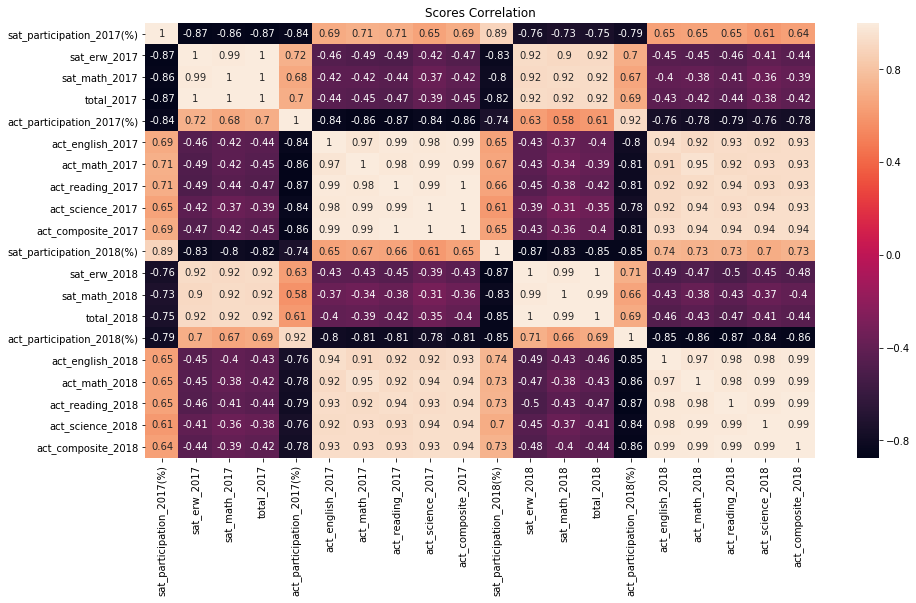

In [49]:
# Plot heatmap for scores

fig, ax=plt.subplots(figsize=(15,8))
ax=sns.heatmap(all_scores.corr(),annot=True)
ax.set_title("Scores Correlation")

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [50]:
def subplot_histograms(dataframe, list_of_columns, x_label):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure there are enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12,8)) 
    fig.subplots_adjust(hspace=0.4, wspace=0.4) #adjust position of subplots
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=20) # Plots histogram
        ax[i].set_title(column)
        ax[i].set_xlabel(x_label) # x label
        ax[i].set_ylabel('No of States')  # y label
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

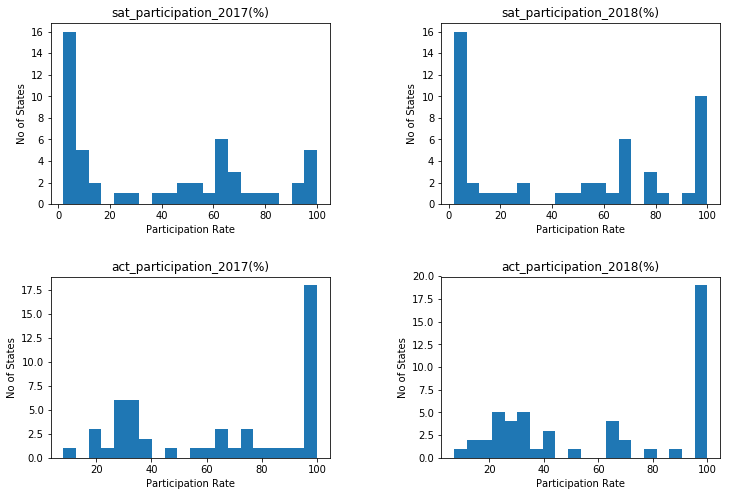

In [51]:
# Plots SAT and ACT participation rates for 2017 and 2018
col_list=['sat_participation_2017(%)','sat_participation_2018(%)', 'act_participation_2017(%)', 'act_participation_2018(%)']
subplot_histograms(all_scores,col_list,"Participation Rate")

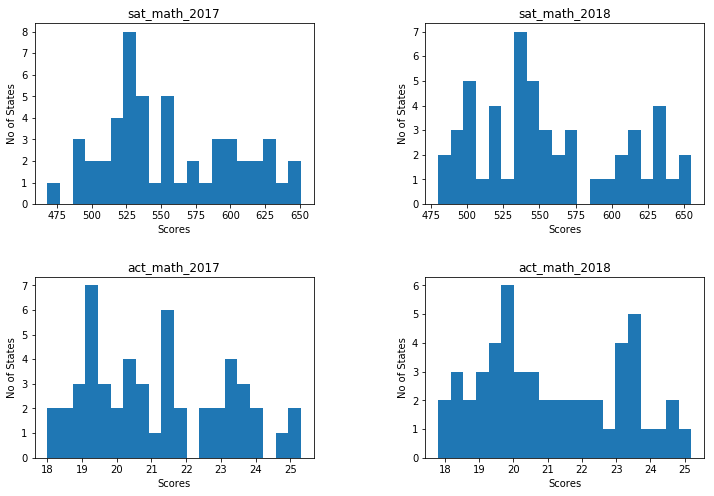

In [52]:
# Plots SAT and ACT Math Scores for 2017 and 2018
col_list=['sat_math_2017','sat_math_2018', 'act_math_2017', 'act_math_2018']
subplot_histograms(all_scores,col_list, "Scores")

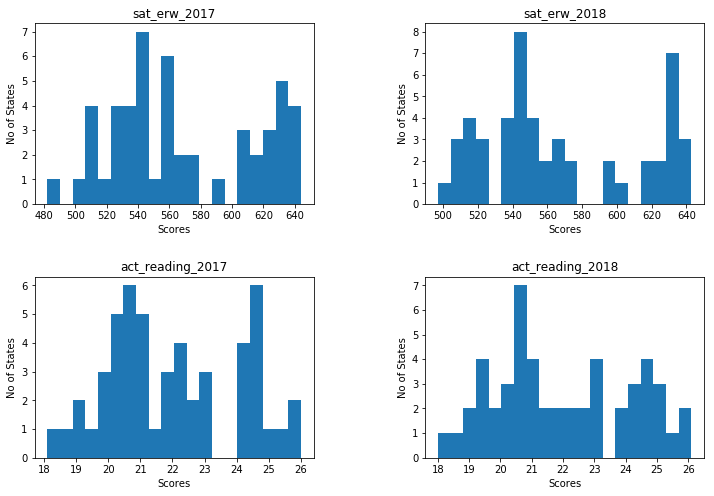

In [53]:
# Plots SAT and ACT reading scores for 2017 and 2018
col_list=['sat_erw_2017','sat_erw_2018', 'act_reading_2017', 'act_reading_2018']

subplot_histograms(all_scores, col_list, 'Scores')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [54]:
# Scatter plot
def plot_scatter(dataframe, x_axis, y_axis):        
        ax=dataframe.plot.scatter(x = x_axis, y =y_axis,alpha=0.8)
        ax.set_title('Scatter plot of ' + y_axis + ' vs. ' + x_axis)        

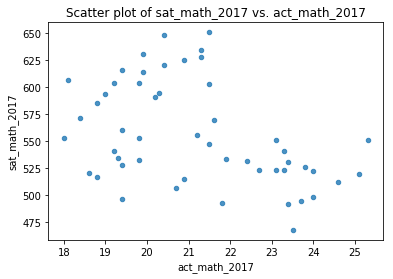

In [55]:
#SAT vs. ACT math scores for 2017
plot_scatter(all_scores, 'act_math_2017','sat_math_2017')

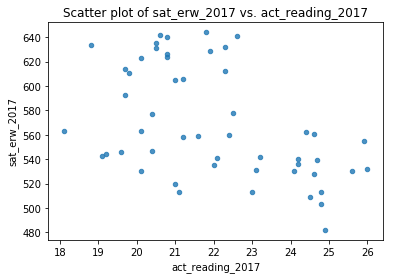

In [56]:
#SAT vs. ACT verbal/reading scores for 2017
plot_scatter(all_scores, 'act_reading_2017','sat_erw_2017')

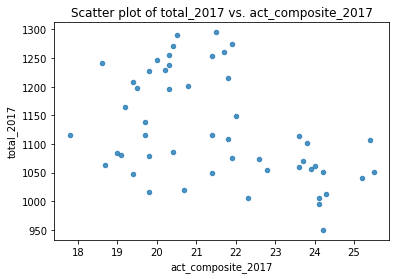

In [57]:
# SAT vs. ACT total/composite scores for 2017
plot_scatter(all_scores, 'act_composite_2017','total_2017')

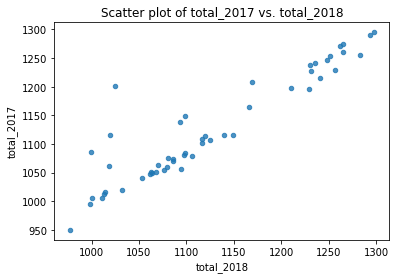

In [58]:
# Total scores for SAT 2017 vs. 2018
plot_scatter(all_scores, 'total_2018','total_2017')

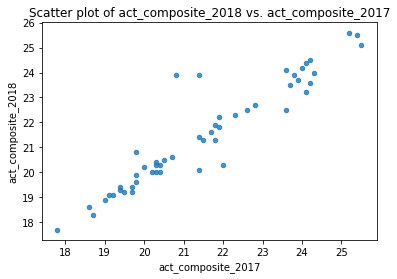

In [59]:
#Composite scores for ACT 2017 vs. 2018
plot_scatter(all_scores, 'act_composite_2017','act_composite_2018')

There is a positive correlation for SAT and ACT scores for 2017 and 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [60]:
def box_plot(dataframe, list_of_columns, title):
    fig, ax=plt.subplots(figsize=(20,8))
    ax=sns.boxplot(data=dataframe,order=list_of_columns)
    ax.set_title(title)

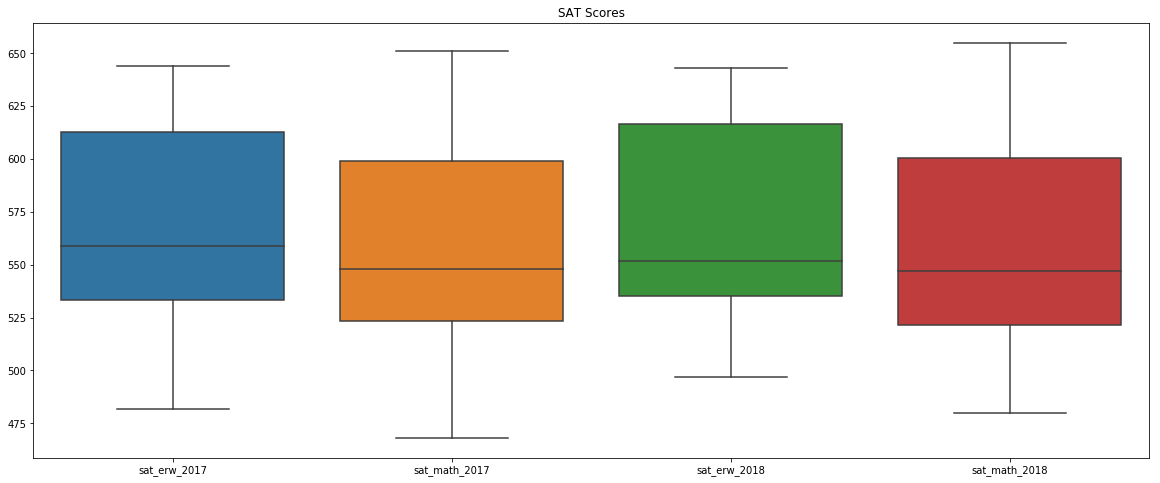

In [61]:
# Boxplot for SAT scores
list_col=['sat_erw_2017','sat_math_2017','sat_erw_2018','sat_math_2018']
box_plot(all_scores, list_col, "SAT Scores")

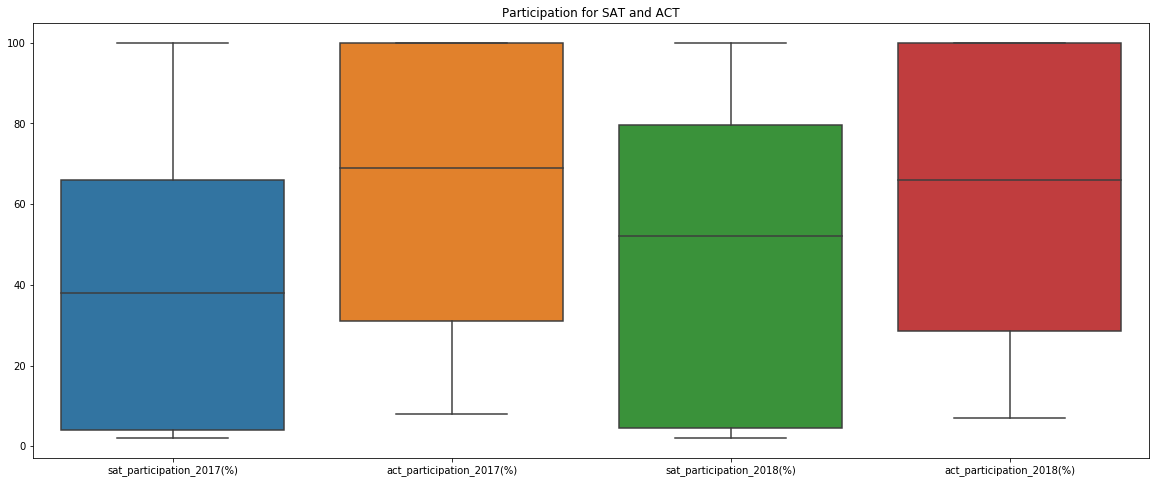

In [62]:
# Boxplot for participation rates for SAT and ACT
list_col=['sat_participation_2017(%)','act_participation_2017(%)','sat_participation_2018(%)','act_participation_2018(%)']
box_plot(all_scores, list_col, "Participation for SAT and ACT")

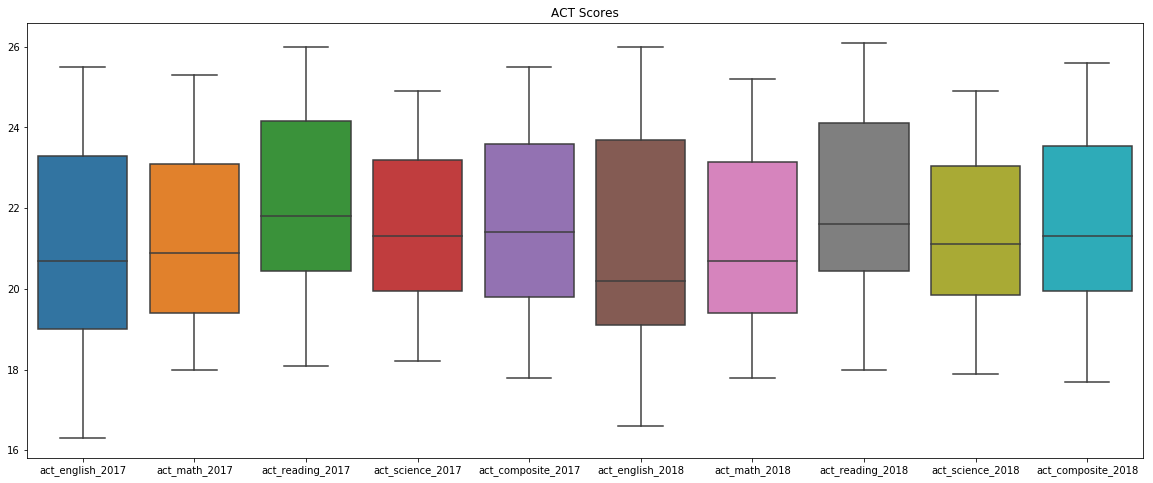

In [63]:
list_col=['act_english_2017','act_math_2017','act_reading_2017','act_science_2017','act_composite_2017',
        'act_english_2018','act_math_2018','act_reading_2018','act_science_2018','act_composite_2018']
box_plot(all_scores, list_col, "ACT Scores")

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

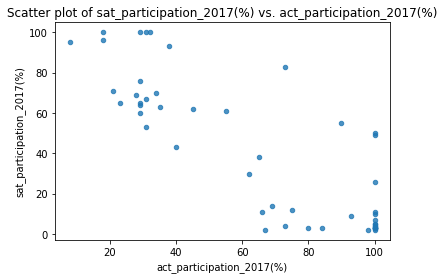

In [64]:
#Participation for ACT vs SAT 2017
plot_scatter(all_scores, 'act_participation_2017(%)','sat_participation_2017(%)')

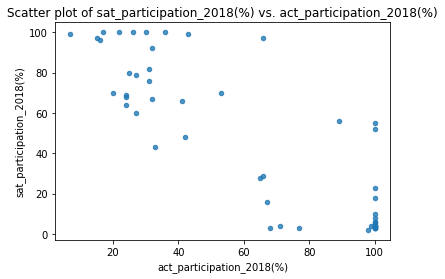

In [65]:
#Participation for ACT vs SAT 2018
plot_scatter(all_scores, 'act_participation_2018(%)','sat_participation_2018(%)')

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Here are the Mean, median and standard deviation values for each variables.

sat_participation_2017(%)
Mean=	39.80
std=	35.28
Median=	38

sat_erw_2017
Mean=	569.12
std=	45.67
Median=	559

sat_math_2017
Mean=	556.88
std=	47.12
Median=	548

total_2017
Mean=	1126.10
std=	92.49
Median=	1107

act_participation_2017(%)
Mean=	65.25
std=	32.14
Median=	69

act_english_2017
Mean=	20.93
std=	2.35
Median=	20.7

act_math_2017
Mean=	21.18
std=	1.98
Median=	20.9

act_reading_2017
Mean=	22.01
std=	2.07
Median=	21.8

act_science_2017
Mean=	21.45
std=	1.74
Median=	21.3

act_composite_2017
Mean=	21.52
std=	2.02
Median=	21.4

sat_participation_2018(%)
Mean=	46.63
std=	38.01
Median=	52

sat_erw_2018
Mean=	567.29
std=	45.32
Median=	552

sat_math_2018
Mean=	557.47
std=	49.21
Median=	547

total_2018
Mean=	1125.27
std=	94.45
Median=	1099

act_participation_2018(%)
Mean=	61.65
std=	34.08
Median=	66

act_english_2018
Mean=	20.99
std=	2.45
Median=	20.2

act_math_2018
Mean=	21.13
std=	2.04
Median=	20.7

act_reading_2018
Mean=	22.02
std=	2.17
Median=	21.6

act_science_2018
Mean=	21.35
std=	1.87
Median=	21.1

act_composite_2018
Mean=	21.49
std=	2.11
Median=	21.3

SAT participation 2017, sat erw_2017, sat math 2017, total_2017, act_english_2017, act_math_2017, act_reading_2017, act_science_2017, act_composite_2017, sat_participation_2018(%), sat_erw_2018, sat_math_2018, total_2018, act_english_2018, act_math_2018, act_reading_2018, act_science_2018, act_composite_2018 are positive skewed. Their means are larger than the median

ACT participation for 2017 and 2018 are negative skewed as their means are smaller than the median.

Standard deviations for SAT  and ACT participation 2017 and 2018 are quite large hence they are spread out away from the mean.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Based on the plots, we did not observe a normal distribution.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

The assumption does not hold as the results are grouped by the states and they are not randomly sampled from the whole population.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

SAT and ACT participation rates have a negative correlation. If more students in the states take the SAT, naturally they would not take ACT.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

No.Based on the scatter plots, there is no correlation between the SAT and ACT math scores

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Taking the hypothesis that there is indeed a relation between SAT and ACT scores across the states.

In [66]:
control=all_scores['sat_participation_2018(%)']
experimental=all_scores['act_participation_2018(%)']

In [67]:
# Code:
result = stats.ttest_ind(experimental, control)
result.statistic, result.pvalue

(2.1009088225582375, 0.038163511664521345)

P value is lesser than 0.05. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

The three states are Colorado, Illinois, Ohio. The SAT participation rates for Colorado and Illinois increased significantly from 2017 to 2018. Colorado increased from 11% to 100% and Illinois increased from 9% to 99%. Colorado and Illinois  are one of the states that gave the SAT to public school students for free. The state of Ohio paid for the ACT tests for the students.

https://blogs.edweek.org/edweek/high_school_and_beyond/2018/10/more_than_2_million_students_take_the_sat.html

https://www.daytondailynews.com/news/historically-low-act-scores-red-flag-for-our-country/djfx9Urp719WyEaMfykyxL/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Although the distribution of the sample means approaches a normal distribution as the sample size gets large, we did not observe this in ur plots. We would recommend to take samples from the whole country rather than states to observe the normal distribution.

Alaska seen a drop from 65% to 33% for the ACT participation with no significant increase for the SAT sccores (38% to 43%).
Alaska is one the of the lower population states. The College Board could encourage participtation by providing fee wavivers and to encourage shools to let students take SAT on school days.